<h2>Library</h2>

In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

<h2>Function</h2>

In [26]:
import matplotlib.pyplot as plt
from scipy import stats

def plot_significant_dif(df):
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))

    metrics = ['Reach', 'Impressions', 'Frequency', 'Clicks']

    for i, metric in enumerate(metrics):
        ax = axes[i]
        data_aiq = df[metric][df['Provider'] == 'AIQ']
        data_lr = df[metric][df['Provider'] == 'LR']
        
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(data_aiq, data_lr)

        ax.boxplot([data_aiq, data_lr], labels=['AIQ', 'LR'])
        ax.set_title(metric, fontsize=10)
        ax.set_ylabel('Value', fontsize=8)
        ax.tick_params(axis='both', labelsize=8)
        
        # Add a text annotation for significance
        alpha = 0.05
        if p_value < alpha:
            ax.text(0.5, -0.2, "Significant", transform=ax.transAxes, fontsize=8, ha='center', color='red')
        else:
            ax.text(0.5, -0.2, "Not Significant", transform=ax.transAxes, fontsize=8, ha='center', color='green')

    plt.tight_layout()
    plt.show()


<h2>Main</h2>

In [20]:
df = pd.read_csv(r'csv\df.csv', parse_dates=['Date'])

# Filter data for AU, BR, CA & FR
df_au = df[df['Country'].str.contains('AU')]
df_br = df[df['Country'].str.contains('BR')]
df_ca = df[df['Country'].str.contains('CA')]
#df_fr = df[df['Country'].str.contains('FR')]

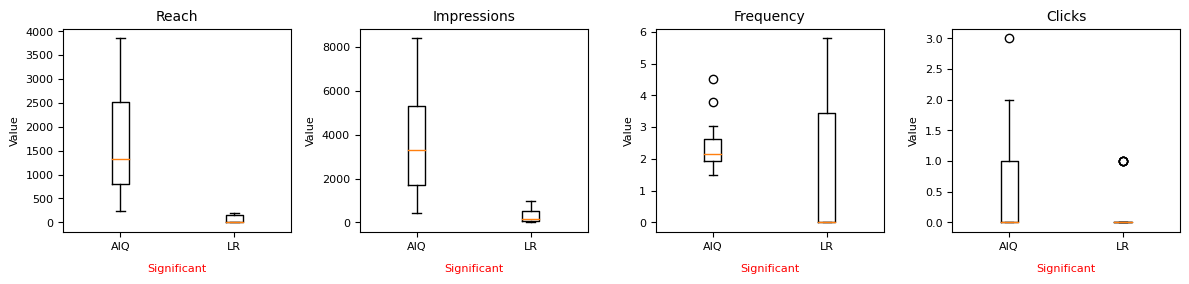

In [27]:
plot_significant_dif(df_ca)